# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
row_data=soup.find_all('tr',class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data_list=[]

# Loop through the scraped data to create a list of rows

for row in row_data:
    a=[item.text for item in row.find_all('td')]
    data_list.append(a)

data_list



[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

columns = ['id', 'terrestial_date', 'sol', 'ls', 'month','min_Temp','Pressure']
df = pd.DataFrame(data_list, columns=columns)

In [14]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestial_date,sol,ls,month,min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [19]:
# Examine data type of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1867 non-null   object
 1   terrestial_date  1867 non-null   object
 2   sol              1867 non-null   object
 3   ls               1867 non-null   object
 4   month            1867 non-null   object
 5   min_Temp         1867 non-null   object
 6   Pressure         1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB
None


In [20]:
# Change data types for data analysis
df['terrestial_date'] = pd.to_datetime(df['terrestial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_Temp'] = df['min_Temp'].astype(float)
df['Pressure'] = df['Pressure'].astype(float)


In [21]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                         object
terrestial_date    datetime64[ns]
sol                         int32
ls                          int32
month                       int32
min_Temp                  float64
Pressure                  float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
total_month = df['month'].nunique()
total_month

12

In [28]:
# 2. How many sols (Martian days) worth of data are there?
total_sols=df['sol'].nunique()
total_sols

1867

In [32]:
# 3. What is the average minimum temperature by month?
avg_min=df.groupby('month')['min_Temp'].mean()
avg_min

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_Temp, dtype: float64

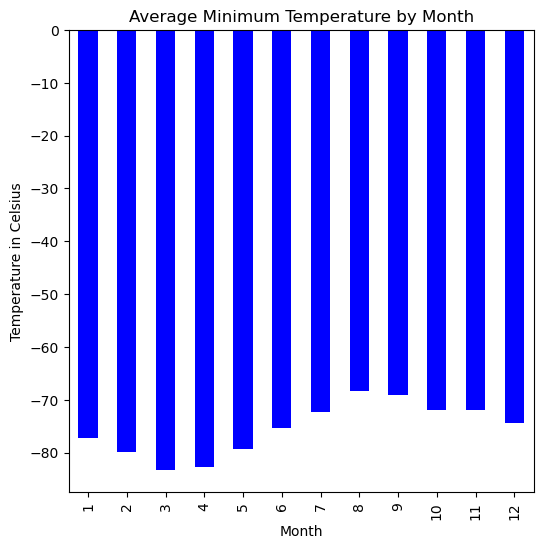

In [45]:
# Plot the average minimum temperature by month

avg_min.plot(kind='bar', figsize=(6, 6), color='blue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

plt.show()

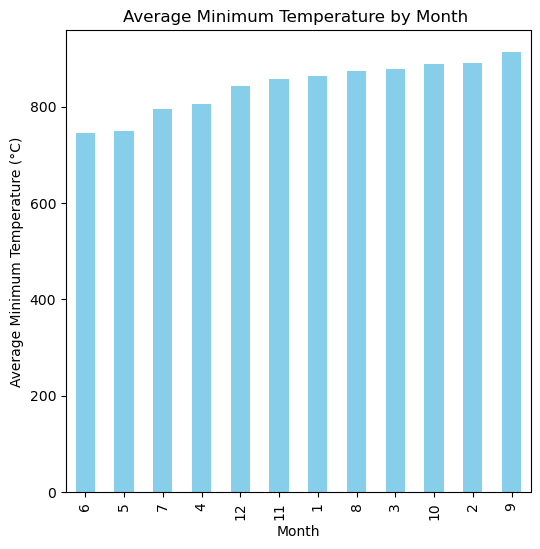

In [51]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperatures
sorted_avg_min_temp = avg_min.sort_values()

# Plotting
sorted_avg_min_temp.plot(kind='bar', figsize=(6, 6), color='skyblue')
plt.title('Average Minimum Temperature by Month ')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

plt.show()


In [47]:
# 4. What is the average pressure by month?
avg_pressure=df.groupby('month')['Pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

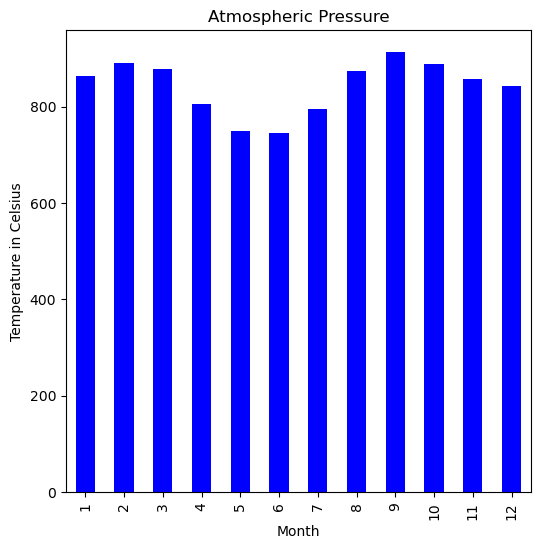

In [ ]:
# Plot the average pressure by month

avg_pressure.plot(kind='bar', figsize=(6, 6), color='blue')
plt.title('Atmospheric Pressure')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

plt.show()

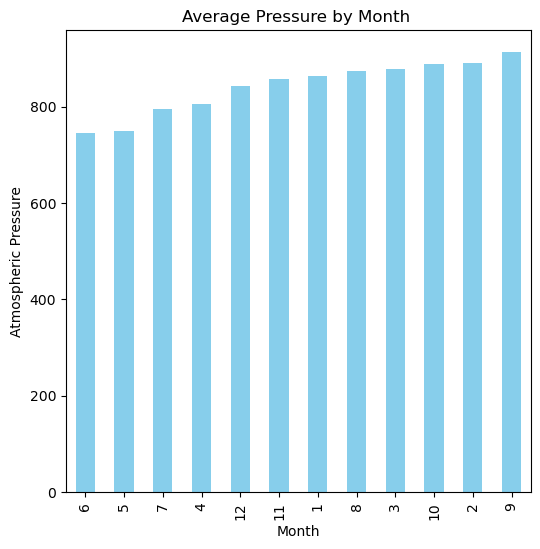

In [50]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_avg_pressure = avg_pressure.sort_values()

# Plotting
sorted_avg_pressure.plot(kind='bar', figsize=(6, 6), color='skyblue')
plt.title('Average Pressure by Month ')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()


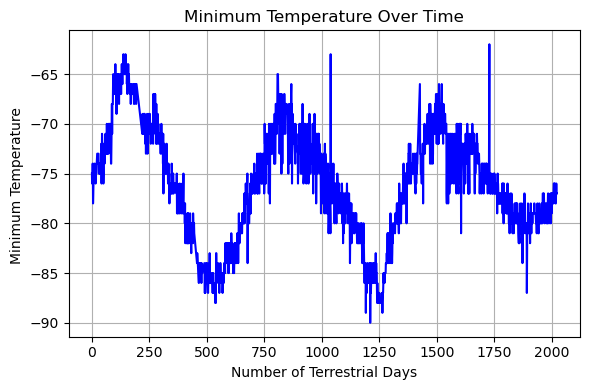

In [68]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

start_date = df['terrestial_date'].min()
df['terrestial_days'] = (df['terrestial_date'] - start_date).dt.days
df.sort_values('terrestial_days', inplace=True)
plt.figure(figsize=(6, 4))
plt.plot(df['terrestial_days'], df['min_Temp'], color='blue')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature ')
plt.grid()
plt.tight_layout()
plt.show()



#### Minimum Temperature

Minimum Temperature is in month january- -77.160920

#### Atmospheric Pressure

The average atmospheric Pressure ranges between - 747>atm.pressure<914

#### Year Length

The year length -calculated from graph - by taking the length of an cycle 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV


In [22]:
browser.quit()